# GAN

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

In [3]:
def build_generator():

    noise_shape = (100,)        

    model = Sequential()

    model.add(Dense(256, input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()

    noise = Input(shape=noise_shape)
    img = model(noise)    #Generated image

    return Model(noise, img)

In [4]:
def build_discriminator():


    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)

In [7]:
def train(epochs, batch_size=128, save_interval=50):

    # Load the dataset
    (X_train, _), (_, _) = mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5

#Add channels dimension. As the input to our gen and discr. has a shape 28x28x1.
    X_train = np.expand_dims(X_train, axis=3) 

    half_batch = int(batch_size / 2)


    
    for epoch in range(epochs):

        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]

 
        noise = np.random.normal(0, 1, (half_batch, 100))

        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))

        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) 

        noise = np.random.normal(0, 1, (batch_size, 100)) 

        valid_y = np.array([1] * batch_size) 

        g_loss = combined.train_on_batch(noise, valid_y)


        
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        if epoch % save_interval == 0:
            save_imgs(epoch)


def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("/content/Untitled Folder/mnist_%d.png" % epoch)
    plt.close()


discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=optimizer)
 
z = Input(shape=(100,))  
img = generator(z)
    
discriminator.trainable = False  
 
valid = discriminator(img)  


combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)


train(epochs=5000, batch_size=32, save_interval=10)

generator.save('generator_model.h5')

Streaming output truncated to the last 5000 lines.
0 [D loss: 0.737296, acc.: 43.75%] [G loss: 0.751105]
1 [D loss: 0.353248, acc.: 78.12%] [G loss: 0.739634]
2 [D loss: 0.340953, acc.: 84.38%] [G loss: 0.812970]
3 [D loss: 0.321818, acc.: 87.50%] [G loss: 0.819977]
4 [D loss: 0.299441, acc.: 100.00%] [G loss: 0.905710]
5 [D loss: 0.285807, acc.: 93.75%] [G loss: 1.056726]
6 [D loss: 0.272551, acc.: 93.75%] [G loss: 1.163008]
7 [D loss: 0.231771, acc.: 100.00%] [G loss: 1.389424]
8 [D loss: 0.175379, acc.: 100.00%] [G loss: 1.516266]
9 [D loss: 0.133016, acc.: 100.00%] [G loss: 1.595500]
10 [D loss: 0.147980, acc.: 100.00%] [G loss: 1.716678]
11 [D loss: 0.139306, acc.: 96.88%] [G loss: 1.816870]
12 [D loss: 0.118824, acc.: 100.00%] [G loss: 2.106720]
13 [D loss: 0.098426, acc.: 100.00%] [G loss: 2.097539]
14 [D loss: 0.089534, acc.: 100.00%] [G loss: 2.281631]
15 [D loss: 0.051162, acc.: 100.00%] [G loss: 2.446916]
16 [D loss: 0.055646, acc.: 100.00%] [G loss: 2.459847]
17 [D loss: 0.

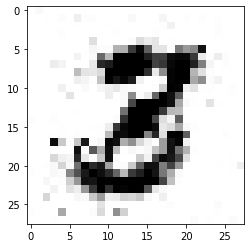

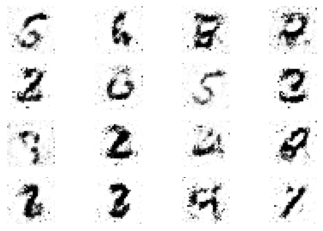

In [9]:
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
from numpy.random import randn

# load model
model = load_model('generator_model.h5')

vector = randn(100) 
vector = vector.reshape(1, 100)

# generate image
X = model.predict(vector)

# plot the result
pyplot.imshow(X[0, :, :, 0], cmap='gray_r')
pyplot.show()

from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot as plt
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	plt.show()
# load model
model = load_model('generator_model.h5')
# generate images
latent_points = generate_latent_points(100, 16) 
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 4)